In [1]:
cd ../..

/Users/ericpei/Documents/GalvClas/fantasy-score-predictor


In [423]:
from scripts import MakeDF

In [3]:
from scripts import RandomForest

/Users/ericpei/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [4]:
#MakeDF.create_csvs('alldata')

In [5]:
df = MakeDF.create_df()

In [6]:
df = MakeDF.clean_df(df)

scripts/MakeDF.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['MP'] = df['MP'].map(lambda x: '0:00' if ":" not in str(x) else str(x))


In [7]:
df = MakeDF.add_features(df)

In [8]:
Player_Averages = MakeDF.make_averages(df)

In [9]:
date_matrix = MakeDF.get_date_matrix(df)

In [10]:
MakeDF.previous_sp(9, date_matrix)

215

In [11]:
date_matrix[0:10]

array([['A.J. Price', Timestamp('2009-10-30 00:00:00'),
        Timestamp('2009-10-29 00:00:00'), Timestamp('2009-10-28 00:00:00'),
        Timestamp('2009-10-27 00:00:00'), Timestamp('2009-10-26 00:00:00'),
        79],
       ['A.J. Price', Timestamp('2009-11-03 00:00:00'),
        Timestamp('2009-11-02 00:00:00'), Timestamp('2009-11-01 00:00:00'),
        Timestamp('2009-10-31 00:00:00'), Timestamp('2009-10-30 00:00:00'),
        369],
       ['A.J. Price', Timestamp('2009-11-06 00:00:00'),
        Timestamp('2009-11-05 00:00:00'), Timestamp('2009-11-04 00:00:00'),
        Timestamp('2009-11-03 00:00:00'), Timestamp('2009-11-02 00:00:00'),
        685],
       ['A.J. Price', Timestamp('2009-11-11 00:00:00'),
        Timestamp('2009-11-10 00:00:00'), Timestamp('2009-11-09 00:00:00'),
        Timestamp('2009-11-08 00:00:00'), Timestamp('2009-11-07 00:00:00'),
        487],
       ['A.J. Price', Timestamp('2009-11-22 00:00:00'),
        Timestamp('2009-11-21 00:00:00'), Timestamp('2009

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288248 entries, 0 to 288247
Data columns (total 43 columns):
Player Name    288248 non-null object
FG             288248 non-null int64
FGA            288248 non-null int64
FG%            288248 non-null float64
3P             288248 non-null int64
3PA            288248 non-null int64
3P%            288248 non-null float64
FT             288248 non-null int64
FTA            288248 non-null int64
FT%            288248 non-null float64
ORB            288248 non-null int64
DRB            288248 non-null int64
TRB            288248 non-null int64
AST            288248 non-null int64
STL            288248 non-null int64
BLK            288248 non-null int64
TOV            288248 non-null int64
PF             288248 non-null int64
PTS            288248 non-null int64
+/-            288248 non-null int64
TS%            288248 non-null float64
eFG%           288248 non-null float64
3PAr           288248 non-null float64
FTr            288248 non

In [13]:
MakeDF.addcolumns(MakeDF.make_lists(date_matrix), df)

In [14]:
df[100000:110000]

,Player Name,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,...,Date,SP,DateM1,DateM2,DateM3,DateM4,SP_1dayago,SP_2dayago,SP_3dayago,SP_4dayago
100000,Glen Davis,4,8,0.500,0,0,0.000,0,0,0.000,...,2009-02-23,1682,2009-02-22,2009-02-21,2009-02-20,2009-02-19,1474,0,0,986
100001,Glen Davis,5,7,0.714,0,0,0.000,4,6,0.667,...,2009-02-25,1609,2009-02-24,2009-02-23,2009-02-22,2009-02-21,0,1682,1474,0
100002,Glen Davis,6,12,0.500,0,0,0.000,6,9,0.667,...,2009-02-27,1499,2009-02-26,2009-02-25,2009-02-24,2009-02-23,0,1609,0,1682
100003,Glen Davis,7,13,0.538,0,0,0.000,4,7,0.571,...,2009-03-01,2142,2009-02-28,2009-02-27,2009-02-26,2009-02-25,0,1499,0,1609
100004,Glen Davis,3,8,0.375,0,0,0.000,0,0,0.000,...,2009-03-04,2093,2009-03-03,2009-03-02,2009-03-01,2009-02-28,0,0,2142,0
100005,Glen Davis,5,8,0.625,0,0,0.000,0,1,0.000,...,2009-03-06,1028,2009-03-05,2009-03-04,2009-03-03,2009-03-02,0,2093,0,0
100006,Glen Davis,0,3,0.000,0,0,0.000,0,0,0.000,...,2009-03-08,1117,2009-03-07,2009-03-06,2009-03-05,2009-03-04,0,1028,0,2093
100007,Glen Davis,4,9,0.444,0,0,0.000,0,0,0.000,...,2009-03-18,2456,2009-03-17,2009-03-16,2009-03-15,2009-03-14,0,0,0,0
100008,Glen Davis,2,5,0.400,0,0,0.000,3,6,0.500,...,2009-03-20,1606,2009-03-19,2009-03-18,2009-03-17,2009-03-16,0,2456,0,0
100009,Glen Davis,8,11,0.727,0,0,0.000,8,9,0.889,...,2009-03-21,1762,2009-03-20,2009-03-19,2009-03-18,2009-03-17,1606,0,2456,0


In [15]:
tp_matrix = df[['Player Name', '3P']].values
fg_matrix = df[['Player Name', 'FG']].values
ft_matrix = df[['Player Name', 'FT']].values
reb_matrix = df[['Player Name', 'TRB']].values
ast_matrix = df[['Player Name', 'AST']].values
blk_matrix = df[['Player Name', 'BLK']].values
stl_matrix = df[['Player Name', 'STL']].values
tov_matrix = df[['Player Name', 'TOV']].values

In [16]:
MakeDF.add_slag_columns(MakeDF.make_stat_lists(Player_Averages, matrix=tp_matrix, column='3P'), df, name='TP')
MakeDF.add_slag_columns(MakeDF.make_stat_lists(Player_Averages, matrix=fg_matrix, column='FG'), df, name='FG')
MakeDF.add_slag_columns(MakeDF.make_stat_lists(Player_Averages, matrix=ft_matrix, column='FT'), df, name='FT')
MakeDF.add_slag_columns(MakeDF.make_stat_lists(Player_Averages, matrix=reb_matrix, column='TRB'), df, name='TRB')
MakeDF.add_slag_columns(MakeDF.make_stat_lists(Player_Averages, matrix=ast_matrix, column='AST'), df, name='AST')
MakeDF.add_slag_columns(MakeDF.make_stat_lists(Player_Averages, matrix=blk_matrix, column='BLK'), df, name='BLK')
MakeDF.add_slag_columns(MakeDF.make_stat_lists(Player_Averages, matrix=stl_matrix, column='STL'), df, name='STL')
MakeDF.add_slag_columns(MakeDF.make_stat_lists(Player_Averages, matrix=tov_matrix, column='TOV'), df, name='TOV')

In [17]:
from scripts import ElevationFlight

In [18]:
Elevation_Lookup = ElevationFlight.read_to_dict()

In [19]:
ElevationFlight.lookup_and_add(Elevation_Lookup, df)

In [20]:
df.head()

,Player Name,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,...,BLK4dayago,STL1dayago,STL2dayago,STL3dayago,STL4dayago,TOV1dayago,TOV2dayago,TOV3dayago,TOV4dayago,Elevation
0,A.J. Price,0,0,0.000,0,0,0.0,0,0,0.0,...,0.030303,0.420875,0.420875,0.420875,0.420875,0.771044,0.771044,0.771044,0.771044,715
1,A.J. Price,1,2,0.500,1,2,0.5,0,0,0.0,...,0.030303,0.000000,0.420875,0.420875,0.420875,0.000000,0.771044,0.771044,0.771044,715
2,A.J. Price,2,4,0.500,2,4,0.5,0,0,0.0,...,0.030303,0.000000,0.000000,0.420875,0.420875,0.000000,0.000000,0.771044,0.771044,715
3,A.J. Price,0,1,0.000,0,0,0.0,1,2,0.5,...,0.030303,1.000000,0.000000,0.000000,0.420875,0.000000,0.000000,0.000000,0.771044,715
4,A.J. Price,2,3,0.667,1,2,0.5,1,1,1.0,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,751


# PLAY HERE

In [21]:
from sklearn.metrics import mean_squared_error

In [22]:
from sklearn.ensemble import RandomForestRegressor

In [23]:
forest_df, y_df = RandomForest.prepare_for_forest(df)

In [24]:
Stephcurry, Stephcurry_X, Stephcurry_y = RandomForest.individual_forest_df(forest_df, y_df, 'Danny Green')

In [25]:
X_train, X_test, y_train, y_test = RandomForest.crossval_player(Stephcurry, forest_df[forest_df["Player Name"] != 'Danny Green'], y_df[y_df['Player Name'] != 'Danny Green'], cat=2)
X_train2, X_test2, y_train2, y_test2 = RandomForest.crossval_player(Stephcurry, Stephcurry_X, Stephcurry_y, cat=2)

scripts/RandomForest.py:50: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
  X_train, X_test, y_train, y_test = train_test_split(player_x[player_x.columns-['Player Name']], player_y.iloc[:,cat], test_size = 0.25, random_state = 30)


In [26]:
X_train = pd.concat([X_train, X_train2])
y_train = pd.concat([y_train, y_train2])

In [27]:
everyFGmean = X_train.FG1dayago.mean()
stephFGmean = X_train2.FG1dayago.mean()

In [28]:
len(X_test), len(X_test2)

(71961, 102)

In [29]:
benchmark = np.full(len(X_test), everyFGmean)
s_benchmark = np.full(len(X_test2), stephFGmean)

In [30]:
rf = RandomForestRegressor()
rf2 = RandomForestRegressor()

In [31]:
rf.fit(X_train, y_train)
rf2.fit(X_train2, y_train2)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [32]:
rf.feature_importances_

array([ 0.01649438,  0.01609348,  0.01680099,  0.0172838 ,  0.00791302,
        0.00785649,  0.00786413,  0.00804509,  0.03261106,  0.25078786,
        0.0923825 ,  0.04924749,  0.07436216,  0.01989578,  0.01907178,
        0.01874719,  0.01935513,  0.0049484 ,  0.01532094,  0.03282507,
        0.02578054,  0.02370772,  0.01013646,  0.01004242,  0.01047253,
        0.01014098,  0.01530045,  0.01438326,  0.01446162,  0.01521657,
        0.00821025,  0.00849422,  0.00887327,  0.00892134,  0.02210493,
        0.02176098,  0.02188373,  0.02220201])

In [33]:
y_predict = rf.predict(X_test)
y_predict2 = rf2.predict(X_test2)

In [34]:
mean_squared_error(y_test, y_predict), mean_squared_error(y_test2, y_predict2)

(5.7699171940319909, 6.4497058823529425)

In [35]:
mean_squared_error(y_test, benchmark), mean_squared_error(y_test2, s_benchmark)

(9.3892382137316979, 5.875967561811513)

In [36]:
y_predict3 = rf.predict(X_test2)
mean_squared_error(y_test2, y_predict3)

6.9112990196078421

In [37]:
y_test2, y_predict3

(62703    4
 62628    7
 62748    6
 62529    2
 62662    2
 62744    5
 62807    2
 62701    2
 62833    1
 62538    3
 62759    2
 62650    2
 62632    4
 62657    0
 62692    5
 62549    4
 62681    5
 62572    0
 62645    3
 62493    2
 62591    2
 62690    0
 62730    3
 62536    3
 62532    6
 62817    3
 62691    5
 62797    2
 62462    0
 62500    2
         ..
 62781    4
 62715    4
 62629    2
 62594    3
 62579    2
 62616    4
 62580    1
 62866    1
 62515    0
 62726    7
 62795    3
 62697    0
 62565    6
 62704    4
 62742    3
 62610    7
 62483    2
 62845    1
 62573    2
 62523    6
 62822    3
 62642    8
 62865    6
 62474    2
 62521    0
 62633    5
 62612    3
 62776    2
 62640    8
 62479    0
 Name: FG, dtype: int64,
 array([ 1.1 ,  4.5 ,  4.1 ,  4.7 ,  2.5 ,  3.4 ,  2.9 ,  1.1 ,  2.3 ,
         4.1 ,  2.9 ,  2.5 ,  2.  ,  2.5 ,  3.6 ,  2.9 ,  2.6 ,  3.7 ,
         1.7 ,  2.5 ,  3.  ,  5.2 ,  5.8 ,  5.9 ,  4.3 ,  4.1 ,  3.1 ,
         3.9 ,  2.6 ,  2.7 ,  

In [38]:
from sklearn.decomposition import PCA

In [39]:
df_green = df[df['Player Name'] == 'Al Jefferson']

In [40]:
def run_pca(df):
    pca              = PCA(n_components=8, whiten=True)
    pca.fit(df)
    top95percent_PC  = get_95_var(pca.explained_variance_ratio_)
    pca.n_components = top95percent_PC
    X_reduced        = pca.fit_transform(df)
    PCA_matrix       = pd.DataFrame(X_reduced)
    return(PCA_matrix, pca.components_)

In [41]:
def get_95_var(array):
    total = 0
    pos = 0
    for x in array:
        total += x
        pos   += 1
        print pos-1, total
        if total>=0.95:
            #print total
            return(pos)

In [42]:
bad_columns = ['Player Name', 'Away', 'Home', 'OneisHome', 'Date', 'DateM1', 'DateM2', 'DateM3', 'DateM4']

In [43]:
cols_to_use = [x for x in df_green.columns if x not in bad_columns]
df_to_use = df_green[cols_to_use]

In [44]:
type(df)

pandas.core.frame.DataFrame

In [45]:
type(df_to_use)

pandas.core.frame.DataFrame

In [46]:
feed_to_pca = df_to_use.iloc[:,:34]

In [47]:
feed_to_pca['Elevation'] = df_to_use['Elevation']

In [48]:
bad_columns2 = ['FG%', '3P%', 'FT%', 'TRB', '3PAr', 'FTr']

In [49]:
cols_to_use = [x for x in feed_to_pca.columns if x not in bad_columns2]
pca_nomnom = feed_to_pca[cols_to_use]

In [50]:
import datetime

In [51]:
a, b = run_pca(pca_nomnom)

0 0.902757493631
1 0.999440292748


In [52]:
pca_nomnom2 = df_to_use[['FG','FG','3P','TRB', 'AST', 'STL', 'BLK', 'TOV']]

In [53]:
a2, b2 = run_pca(pca_nomnom2)

0 0.66685504721
1 0.884979083908
2 0.920680596669
3 0.954040516517


In [54]:
b2

array([[  6.01621007e-01,   6.01621007e-01,   1.67523259e-03,
          5.16634840e-01,   6.19791286e-02,   3.07176692e-02,
          3.64801859e-02,   5.54452199e-02],
       [  3.69072597e-01,   3.69072597e-01,   6.84979337e-04,
         -8.51259693e-01,  -1.35188617e-02,  -8.37608065e-03,
         -1.08457261e-02,  -5.05643590e-02],
       [  3.70222873e-02,   3.70222873e-02,   1.11039168e-04,
          5.11360370e-02,  -9.44800613e-01,  -3.98339187e-02,
         -3.16802177e-01,   6.72574317e-03],
       [ -1.65683749e-02,  -1.65683749e-02,   1.39469172e-03,
         -7.35336651e-02,  -8.34984620e-02,   2.13832250e-02,
          2.50991106e-01,   9.61049459e-01]])

In [424]:
PA = MakeDF.make_averages(df, cutoff=120)

In [147]:
PA.head()

,SP,3P,FG,FT,TRB,AST,BLK,STL,TOV,Score
Player Name,,,,,,,,,,
A.J. Price,793.808081,0.734007,1.848485,0.696970,1.269360,1.909091,0.030303,0.420875,0.771044,9.646128
Aaron Brooks,1340.378168,1.385965,3.836257,1.641326,1.795322,3.181287,0.138402,0.586745,1.660819,17.415595
Aaron Gordon,981.000000,0.315789,2.052632,1.000000,3.644737,0.802632,0.578947,0.460526,0.815789,12.261842
Aaron Gray,650.754930,0.000000,1.239437,0.523944,3.352113,0.583099,0.245070,0.264789,0.746479,8.173239
Aaron Harrison,104.461538,0.076923,0.153846,0.153846,0.307692,0.000000,0.000000,0.076923,0.076923,0.984615


In [278]:
from scripts import PCA_ready

In [256]:
pca_lst = PCA_ready.get_lst_pca(df)

In [260]:
len(pca_lst)

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [307]:
end = PCA_ready.kmeanscluster_ready(pca_lst, PA)

In [311]:
from sklearn.cluster import KMeans

In [286]:
estimators = {'k_means_player_5': KMeans(n_clusters=5, random_state = 30),
              'k_means_player_9': KMeans(n_clusters=9, random_state = 30),
              'k_means_player_13': KMeans(n_clusters=13, random_state = 30),
              'k_means_player_bad_init': KMeans(n_clusters=5, n_init=1,
                                              init='random', random_state = 30)}

In [323]:
km = KMeans(n_clusters=10, random_state = 30)

In [324]:
km.fit(end)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=10, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=30, tol=0.0001,
    verbose=0)

In [325]:
cluster_id = km.labels_

In [326]:
PA.index.values

array(['A.J. Price', 'Aaron Brooks', 'Aaron Gordon', ..., 'Zoran Dragic',
       'Zoran Planinic', 'Zydrunas Ilgauskas'], dtype=object)

In [327]:
dc = PCA_ready.make_cluster_dictionary(km, PA)

In [328]:
dc2 = PCA_ready.make_cluster_dictionary2(km, PA)

In [329]:
dc2

defaultdict(list,
            {0: ['Aaron Gordon',
              'Adonal Foyle',
              'Adrian Griffin',
              'Allan Ray',
              'Allen Iverson',
              'Antonio Daniels',
              'Austin Rivers',
              'Blake Ahearn',
              'Brandon Jennings',
              'Bruce Bowen',
              'Bryce Cotton',
              'Calvin Booth',
              'Cameron Bairstow',
              'Cody Zeller',
              'Craig Brackins',
              'Cuttino Mobley',
              'D.J. White',
              'Damien Wilkins',
              'Damir Markota',
              'Daniel Gibson',
              'David Noel',
              'Delon Wright',
              'Derrick Brown',
              'Derrick Zimmerman',
              'Devin Ebanks',
              'Devin Green',
              'Donell Taylor',
              'Donyell Marshall',
              'Drew Gooden',
              'Drew Gordon',
              'Eddie Griffin',
              'Eric Gordon

# Averages Per Min

In [425]:
PAA = MakeDF.make_averages_per48(PA)

In [426]:
PA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1180 entries, A.J. Price to Zydrunas Ilgauskas
Data columns (total 10 columns):
SP       1180 non-null float64
3P       1174 non-null float64
FG       1174 non-null float64
FT       1174 non-null float64
TRB      1174 non-null float64
AST      1174 non-null float64
BLK      1174 non-null float64
STL      1174 non-null float64
TOV      1174 non-null float64
Score    1180 non-null float64
dtypes: float64(10)
memory usage: 101.4+ KB


In [422]:
PA[PA.isnull().any(axis=1)]

,SP,3P,FG,FT,TRB,AST,BLK,STL,TOV,Score
Player Name,,,,,,,,,,
Duje Dukan,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
Jarell Eddie,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
Jarell Martin,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
Josh Huestis,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
Patric Young,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
Ronald Roberts,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [427]:
PAA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1174 entries, A.J. Price to Zydrunas Ilgauskas
Data columns (total 8 columns):
3P     1174 non-null float64
FG     1174 non-null float64
FT     1174 non-null float64
TRB    1174 non-null float64
AST    1174 non-null float64
BLK    1174 non-null float64
STL    1174 non-null float64
TOV    1174 non-null float64
dtypes: float64(8)
memory usage: 82.5+ KB


In [466]:
mat, comp = PCA_ready.run_pca(PAA)

In [485]:
km = KMeans(n_clusters=5, random_state = 30)
#km = KMeans(n_clusters=10, random_state = 30)


In [434]:
import matplotlib.pyplot as plt

In [437]:
%matplotlib inline

In [473]:
#plt.hist(mat, bins=200)

In [468]:
km.fit(mat)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=30, tol=0.0001,
    verbose=0)

In [469]:
cluster_id = km.labels_

In [491]:
dict_pca2 = PCA_ready.make_cluster_dictionary2(km, PAA)

In [492]:
dict_pca2

defaultdict(list,
            {0: ['Aaron Gordon',
              'Aaron Gray',
              'Aaron Williams',
              'Adonal Foyle',
              'Adreian Payne',
              'Al-Farouq Aminu',
              'Alan Henderson',
              'Alex Len',
              'Alonzo Mourning',
              'Amir Johnson',
              'Anderson Varejao',
              'Andre Brown',
              'Andre Drummond',
              'Andre Emmett',
              'Andrew Bogut',
              'Andris Biedrins',
              'Anthony Bennett',
              'Antonio Davis',
              'Antonio McDyess',
              'Arinze Onuaku',
              'Arnett Moultrie',
              'Ben Wallace',
              'Bernard James',
              'Bismack Biyombo',
              'Bo Outlaw',
              "Boniface N'Dong",
              'Brandan Wright',
              'Brendan Haywood',
              'Brian Grant',
              'Brian Skinner',
              'Calvin Booth',
              'Ca

# Try with original 8

In [472]:
from sklearn.preprocessing import StandardScaler

In [480]:
standard_scaler = StandardScaler()

In [481]:
scaled = standard_scaler.fit_transform(PAA)

In [487]:
km.fit(scaled)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=30, tol=0.0001,
    verbose=0)

In [488]:
dict_nonpca = PCA_ready.make_cluster_dictionary2(km, PAA)

In [489]:
dict_nonpca

defaultdict(list,
            {0: ['Aaron Gordon',
              'Aaron Gray',
              'Aaron Williams',
              'Adonal Foyle',
              'Adreian Payne',
              'Al-Farouq Aminu',
              'Alan Henderson',
              'Alex Len',
              'Alonzo Mourning',
              'Amir Johnson',
              'Anderson Varejao',
              'Andre Brown',
              'Andre Drummond',
              'Andre Emmett',
              'Andrew Bogut',
              'Andris Biedrins',
              'Anthony Bennett',
              'Antonio Davis',
              'Antonio McDyess',
              'Arinze Onuaku',
              'Arnett Moultrie',
              'Ben Wallace',
              'Bernard James',
              'Bismack Biyombo',
              'Bo Outlaw',
              "Boniface N'Dong",
              'Brandan Wright',
              'Brendan Haywood',
              'Brian Grant',
              'Brian Skinner',
              'Calvin Booth',
              'Ca

# 3D Plot on PCA

In [490]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
plt.clf()

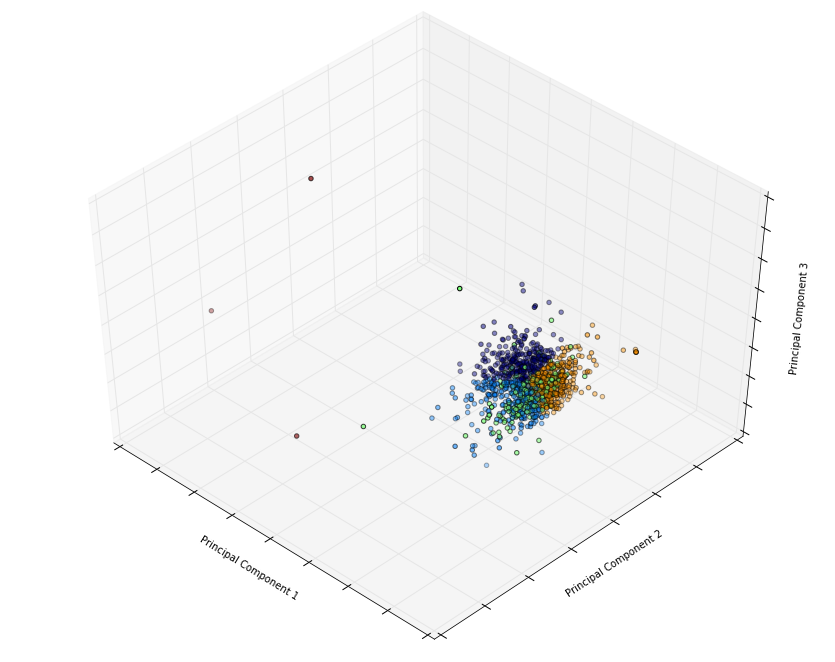

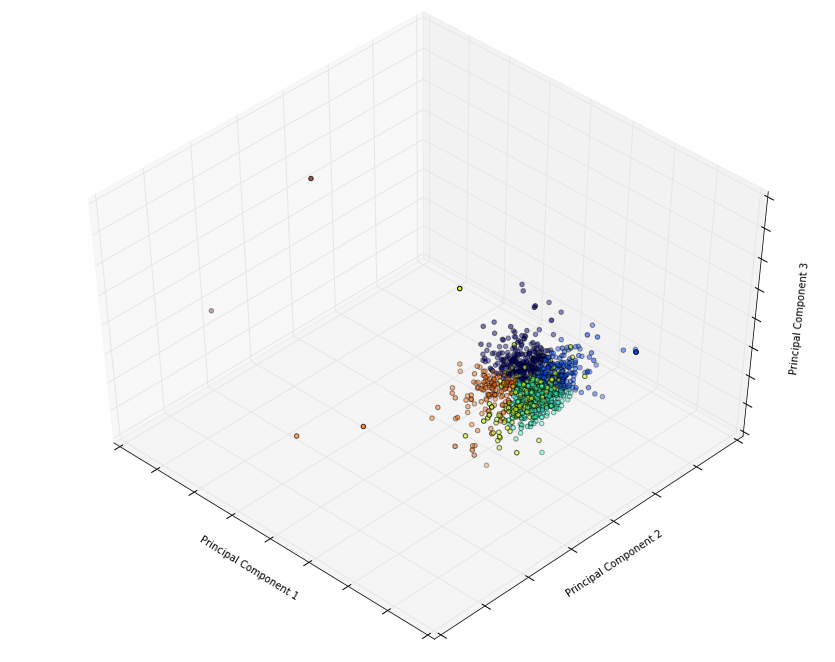

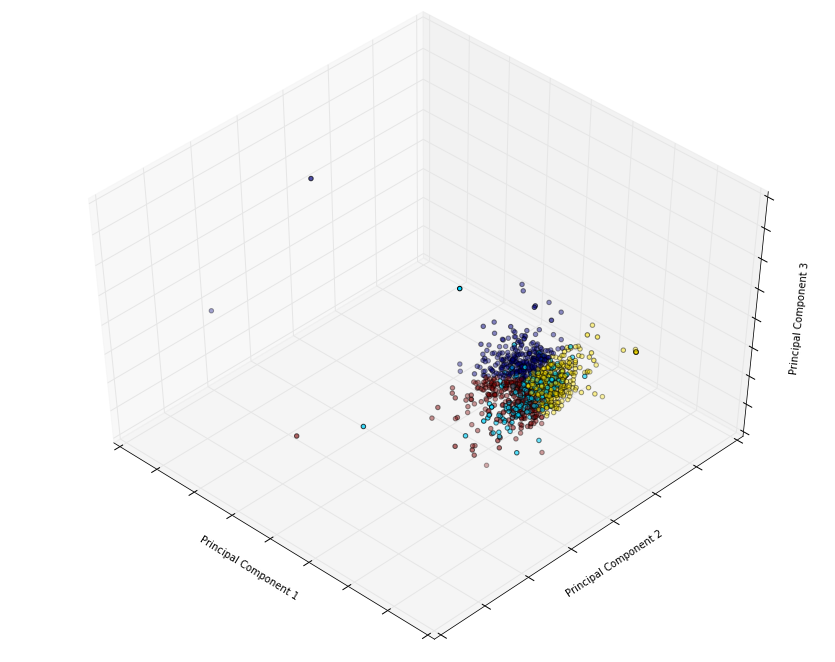

In [510]:
estimators = {'k_means_bball_5': KMeans(n_clusters=4, random_state=30),
              'k_means_bball_9': KMeans(n_clusters=5, random_state=30),
              'k_means_bball_12': KMeans(n_clusters=6, random_state=30)}


fignum = 1
for name, est in estimators.items():
    fig = plt.figure(fignum, figsize=(12, 9))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

    plt.cla()
    est.fit(mat)
    labels = est.labels_

    ax.scatter(mat.iloc[:,0], mat.iloc[:,1], mat.iloc[:,2], c=labels.astype(np.float))

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    fignum = fignum + 1


In [519]:
mat.head()

,0,1,2
0,-1.056955,0.640986,0.335957
1,-1.179005,1.115569,-0.358699
2,0.596492,-0.192178,-0.013346
3,1.410682,-0.003010,0.971065
4,0.213367,-1.107954,-0.619282


#### Points 539, 584, 1046 are problematic

# Find outlier that are messing up PCA

### Drop them from PCA

In [521]:
PAA_nout = PAA.drop(PAA.index[[539,584,1046]])

In [522]:
mat_nout, comp_nout = PCA_ready.run_pca(PAA_nout)

In [524]:
km = KMeans(n_clusters=5, random_state = 30)

In [527]:
km.fit(mat_nout)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=30, tol=0.0001,
    verbose=0)

In [528]:
cluster_id = km.labels_

In [531]:
dict_pca2_nout = PCA_ready.make_cluster_dictionary2(km, PAA_nout)

In [532]:
dict_pca2_nout

defaultdict(list,
            {0: ['A.J. Price',
              'Aaron Brooks',
              'Aaron Miles',
              'Acie Law',
              'Alexey Shved',
              'Allen Iverson',
              'Alvin Williams',
              'Andre Barrett',
              'Andre Iguodala',
              'Andre Miller',
              'Andrei Kirilenko',
              'Andy Rautins',
              'Anthony Carter',
              'Anthony Johnson',
              'Antonio Burks',
              'Antonio Daniels',
              'Armon Johnson',
              'Baron Davis',
              'Ben Hansbrough',
              'Ben Uzoh',
              'Beno Udrih',
              'Bobby Brown',
              'Boris Diaw',
              'Brandon Jennings',
              'Brandon Knight',
              'Brevin Knight',
              'Brian Roberts',
              'Bryon Russell',
              'C.J. Watson',
              'Cameron Payne',
              'Carldell Johnson',
              'Carlos Arroyo',


# Regraph

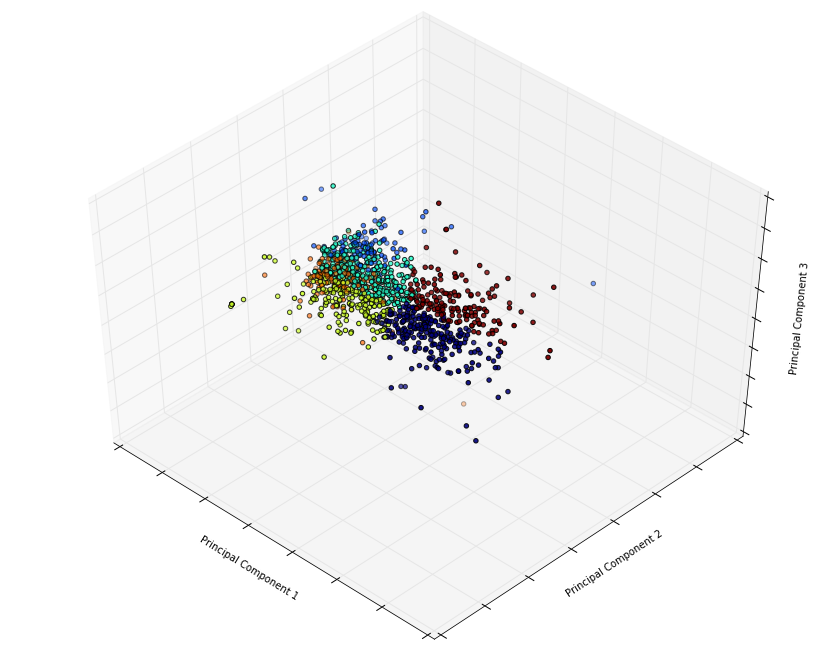

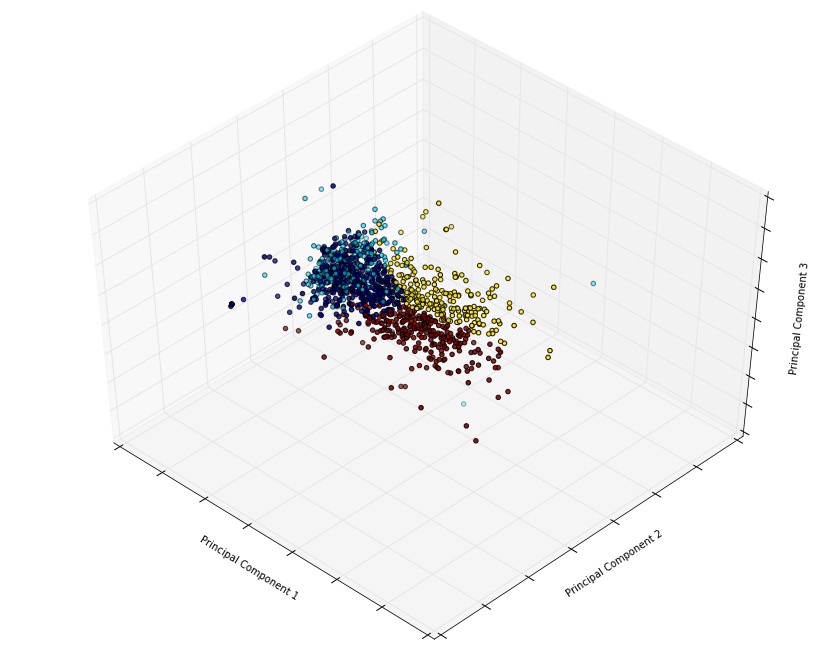

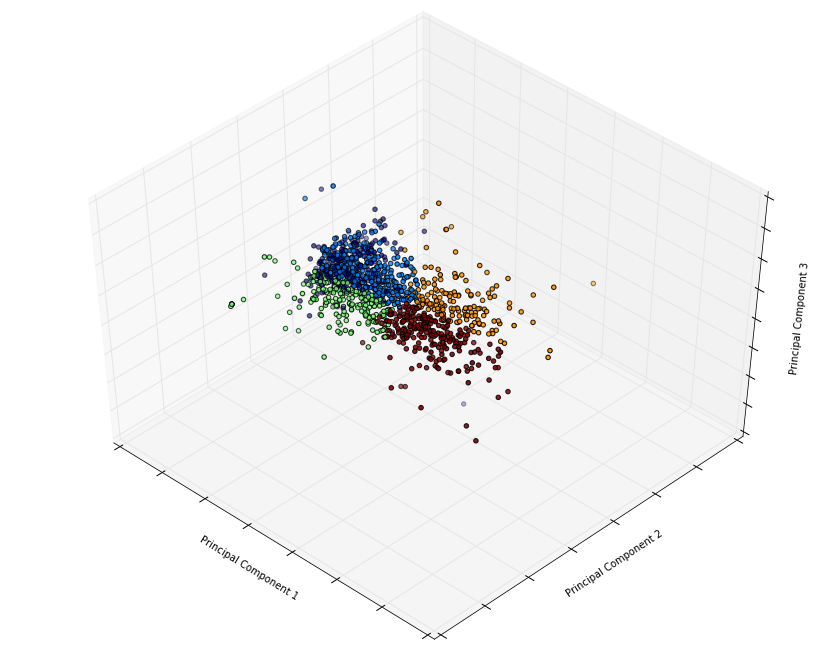

In [534]:
estimators = {'k_means_bball_4': KMeans(n_clusters=4, random_state=30),
              'k_means_bball_5': KMeans(n_clusters=5, random_state=30),
              'k_means_bball_6': KMeans(n_clusters=6, random_state=30)}


fignum = 1
for name, est in estimators.items():
    fig = plt.figure(fignum, figsize=(12, 9))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

    plt.cla()
    est.fit(mat_nout)
    labels = est.labels_

    ax.scatter(mat_nout.iloc[:,0], mat_nout.iloc[:,1], mat_nout.iloc[:,2], c=labels.astype(np.float))

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    fignum = fignum + 1


# Individual Model

In [330]:
sc, scx, scy = RandomForest.individual_forest_df(forest_df, y_df, 'Stephen Curry')